Welcome to Expense Tracker

Expense Tracker Menu:
1. Add Expense
2. Delete Expense
3. View Expenses
4. Generate Summary
5. Export Data
6. Visualize Expenses
7. Highest and Lowest Average Expenses
0. Exit

Expense added successfully

Expense Tracker Menu:
1. Add Expense
2. Delete Expense
3. View Expenses
4. Generate Summary
5. Export Data
6. Visualize Expenses
7. Highest and Lowest Average Expenses
0. Exit

Expense added successfully

Expense Tracker Menu:
1. Add Expense
2. Delete Expense
3. View Expenses
4. Generate Summary
5. Export Data
6. Visualize Expenses
7. Highest and Lowest Average Expenses
0. Exit

Expense added successfully

Expense Tracker Menu:
1. Add Expense
2. Delete Expense
3. View Expenses
4. Generate Summary
5. Export Data
6. Visualize Expenses
7. Highest and Lowest Average Expenses
0. Exit

Expense added successfully

Expense Tracker Menu:
1. Add Expense
2. Delete Expense
3. View Expenses
4. Generate Summary
5. Export Data
6. Visualize Expenses
7. Highest and Lowest A

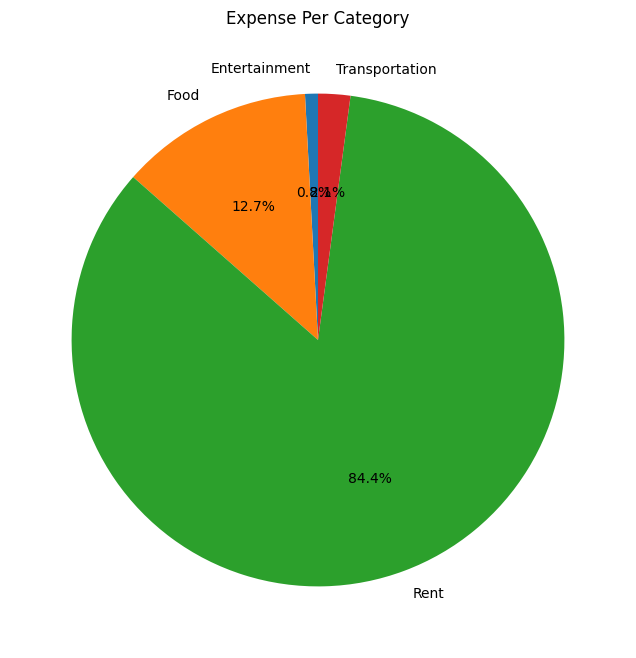

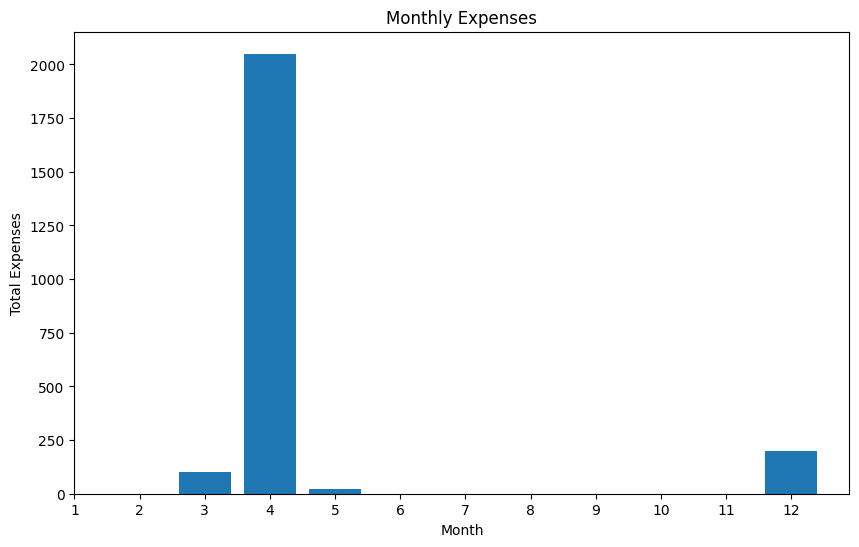

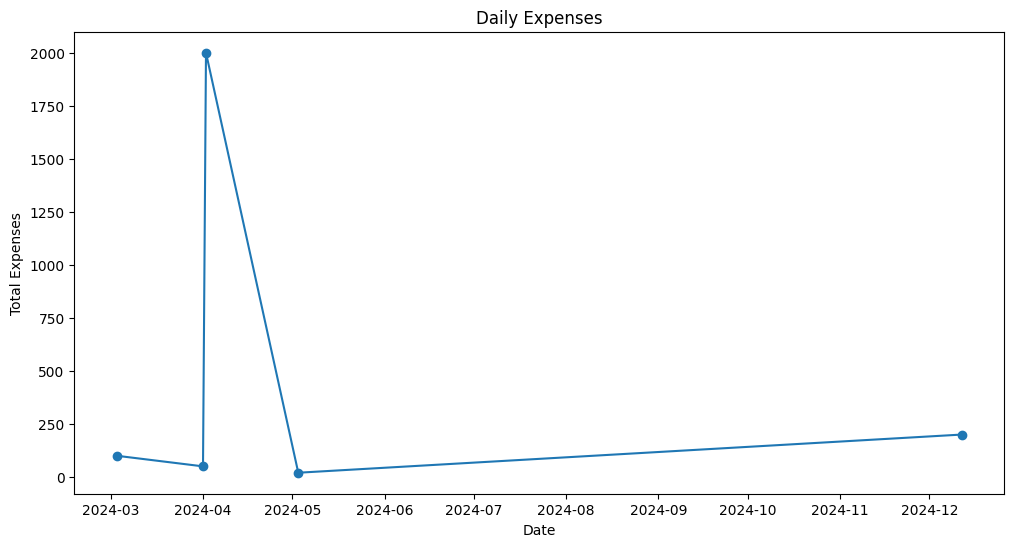




Expense Tracker Menu:
1. Add Expense
2. Delete Expense
3. View Expenses
4. Generate Summary
5. Export Data
6. Visualize Expenses
7. Highest and Lowest Average Expenses
0. Exit
Average Expenses: 474.0
Highest Expenses: 2000.0
Lowest Expenses: 20.0

Expense Tracker Menu:
1. Add Expense
2. Delete Expense
3. View Expenses
4. Generate Summary
5. Export Data
6. Visualize Expenses
7. Highest and Lowest Average Expenses
0. Exit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime
import os
file_name="expense.csv"
def load_data():
  if os.path.exists(file_name):
    df=pd.read_csv(file_name)
  else:
    df=pd.DataFrame(columns=['Date','Category','Description','Amount'])
  return df

def save_data(data):
  data.to_csv(file_name,index=False)

def add_expense(expenses):
    global df
    date = input("Enter date (YYYY-MM-DD): ")
    category = input("Enter category: ")
    amount = float(input("Enter amount: "))
    description = input("Enter description: ")
    new_row={'Date':date,'Category':category,'Description':description,'Amount':amount}
    new_expense_df=pd.DataFrame([new_row])
    df=pd.concat([df,new_expense_df],ignore_index=True)
    save_data(df)
    print("\nExpense added successfully")
    return df

def delete_expenses(df):
  if df.empty:
    print("No expenses to delete")
    return
  print("\nDeleting expenses")
  date=input("Enter date: (DD/MM/YYYY)")
  df=df[df['Date']!=date]
  return df


def generate_summary(df):
  if df.empty:
    print("No expenses to summarize")
    return
  print("\n Summary Data")
  print(df.describe())
  print("\n")
  print(df.head)

def view_expenses(df):
    print("\nExpenses:")
    print(df)

def pie_chart_expense_per_category(df):
    category_expenses=df.groupby('Category')['Amount'].sum()
    plt.figure(figsize=(8,8))
    plt.pie(category_expenses.values,labels=category_expenses.index,autopct='%1.1f%%',startangle=90)
    plt.title('Expense Per Category')
    plt.show()

def bar_monthly_expenses(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Month']=df['Date'].dt.month
    monthly_expenses=df.groupby('Month')['Amount'].sum()
    plt.figure(figsize=(10,6))
    plt.bar(monthly_expenses.index,monthly_expenses.values)
    plt.xlabel('Month')
    plt.ylabel('Total Expenses')
    plt.title('Monthly Expenses')
    plt.xticks(range(1,13))
    plt.show()
def line_graph_daily_expenses(df):
    df['Date']=pd.to_datetime(df['Date'])
    daily_expenses=df.groupby('Date')['Amount'].sum()
    plt.figure(figsize=(12,6))
    plt.plot(daily_expenses.index,daily_expenses.values,marker='o')
    plt.xlabel('Date')
    plt.ylabel('Total Expenses')
    plt.title('Daily Expenses')
    plt.show()
def visualize_expenses():
  global df
  pie_chart_expense_per_category(df)
  print("\n")
  bar_monthly_expenses(df)
  print("\n")
  line_graph_daily_expenses(df)
  print("\n")
def highest_and_lowest_average_expenses(df):
    amount=df['Amount']
    average_expenses=amount.mean()
    highest_expenses=amount.max()
    lowest_expenses=amount.min()
    print(f"Average Expenses: {average_expenses}")
    print(f"Highest Expenses: {highest_expenses}")
    print(f"Lowest Expenses: {lowest_expenses}")

# Initialize expenses list and run the menu-driven interface
df=load_data()
print("Welcome to Expense Tracker")

while True:
    print("\nExpense Tracker Menu:")
    print("1. Add Expense")
    print("2. Delete Expense")
    print("3. View Expenses")
    print("4. Generate Summary")
    print("5. Export Data")
    print("6. Visualize Expenses")
    print("7. Highest and Lowest Average Expenses")
    print("0. Exit")
    choice = input("Enter your choice: ")

    if choice == '1':
        add_expense(df)
        save_data(df)
    elif choice == '2':
        delete_expenses(df)
        save_data(df)
    elif choice == '3':
        view_expenses(df)
    elif choice == '4':
        generate_summary(df)
    elif choice == '5':
        df.to_csv('expenses.csv', index=False)
        print("Data exported successfully.")
    elif choice == '6':
        visualize_expenses()
    elif choice == '7':
        highest_and_lowest_average_expenses(df)
    elif choice == '0':
        print("Exiting Expense Tracker. Goodbye!")
        break
    else:
        print("Invalid choice. Please try again.")
